<a href="https://colab.research.google.com/github/sauravsharm/lab-DL/blob/main/asssignment002_DL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Original x_train shape: {x_train.shape}")
print(f"Original y_train shape: {y_train.shape}")
print(f"Original x_test shape: {x_test.shape}")
print(f"Original y_test shape: {y_test.shape}")

# 2. Reshape image data from 2D arrays to 1D vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
print(f"Reshaped x_train shape: {x_train.shape}")
print(f"Reshaped x_test shape: {x_test.shape}")

# 3. Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(f"Normalized x_train min: {x_train.min()}, max: {x_train.max()}")
print(f"Normalized x_test min: {x_test.min()}, max: {x_test.max()}")

# 4. One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(f"One-hot encoded y_train shape: {y_train.shape}")
print(f"One-hot encoded y_test shape: {y_test.shape}")


Original x_train shape: (60000, 28, 28)
Original y_train shape: (60000,)
Original x_test shape: (10000, 28, 28)
Original y_test shape: (10000,)
Reshaped x_train shape: (60000, 784)
Reshaped x_test shape: (10000, 784)
Normalized x_train min: 0.0, max: 1.0
Normalized x_test min: 0.0, max: 1.0
One-hot encoded y_train shape: (60000, 10)
One-hot encoded y_test shape: (10000, 10)


## Initialize Neural Network Parameters



In [15]:
import numpy as np

# 2. Define the input layer size, hidden layer size, and output layer size
input_size = x_train.shape[1]
hidden_size = 128
output_size = y_train.shape[1]
print(f"Input layer size: {input_size}")
print(f"Hidden layer size: {hidden_size}")
print(f"Output layer size: {output_size}")

# 3. Initialize the weights for the first layer (input to hidden)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)

# 4. Initialize the biases for the first layer (hidden layer)
b1 = np.zeros((1, hidden_size))

# 5. Initialize the weights for the second layer (hidden to output)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)

# 6. Initialize the biases for the second layer (output layer)
b2 = np.zeros((1, output_size))

# 7. Print the shapes of W1, b1, W2, and b2 to verify their dimensions
print(f"Shape of W1: {W1.shape}")
print(f"Shape of b1: {b1.shape}")
print(f"Shape of W2: {W2.shape}")
print(f"Shape of b2: {b2.shape}")

Input layer size: 784
Hidden layer size: 128
Output layer size: 10
Shape of W1: (784, 128)
Shape of b1: (1, 128)
Shape of W2: (128, 10)
Shape of b2: (1, 10)


## Implement Activation Functions


In [16]:
import numpy as np

# 1. Define the ReLU activation function
def relu(Z):
    """Implements the Rectified Linear Unit (ReLU) activation function.
    Arguments:
    Z -- A numpy array (pre-activation parameter).
    Returns:
    A -- Post-activation parameter, same shape as Z.
    cache -- Returns Z, which is useful for backpropagation.
    """
    A = np.maximum(0, Z)
    return A, Z

# 2. Define the derivative of the ReLU activation function
def relu_derivative(dA, cache):
    """Implements the backward propagation for a single ReLU unit.
    Arguments:
    dA -- Post-activation gradient, of any shape.
    cache -- Z, which is the pre-activation parameter stored during forward propagation.
    Returns:
    dZ -- Gradient of the cost with respect to Z.
    """
    Z = cache
    dZ = np.array(dA, copy=True) # Just converting dA to a numpy array
    # When Z <= 0, you should set dZ to 0
    dZ[Z <= 0] = 0
    return dZ

# 3. Define the Softmax activation function
def softmax(Z):
    """Implements the Softmax activation function.
    Arguments:
    Z -- A numpy array (pre-activation parameter).
    Returns:
    A -- Post-activation probabilities, same shape as Z.
    cache -- Returns Z, which is useful for backpropagation.
    """
    # Ensure numerical stability by subtracting the max for each row
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return A, Z


## Implement Forward Propagation


In [17]:
def forward_propagation(X, W1, b1, W2, b2):
    """Implements the forward propagation for the neural network.
    Arguments:
    X -- input data (m, input_size)
    W1 -- weights of the first layer (input_size, hidden_size)
    b1 -- biases of the first layer (1, hidden_size)
    W2 -- weights of the second layer (hidden_size, output_size)
    b2 -- biases of the second layer (1, output_size)
    Returns:
    A2 -- The output of the second activation, also called the post-activation value
    caches -- a dictionary containing "Z1", "A1", "Z2"
    """
    # Layer 1: Input to Hidden
    Z1 = X.dot(W1) + b1
    A1, cache_Z1 = relu(Z1)

    # Layer 2: Hidden to Output
    Z2 = A1.dot(W2) + b2
    A2, cache_Z2 = softmax(Z2)

    caches = {"Z1": cache_Z1, "A1": A1, "Z2": cache_Z2}

    return A2, caches

## Implement Backward Propagation


In [18]:
def backward_propagation(X, Y, caches, W1, W2):

    m = X.shape[0]

    # Retrieve values from caches
    A1 = caches["A1"]
    Z1 = caches["Z1"]
    Z2 = caches["Z2"]
    exp_Z2 = np.exp(Z2 - np.max(Z2, axis=1, keepdims=True))
    A2 = exp_Z2 / np.sum(exp_Z2, axis=1, keepdims=True)

    # 2. Calculate dZ2
    dZ2 = A2 - Y

    # 3. Calculate dW2
    dW2 = (1 / m) * np.dot(A1.T, dZ2)

    # 4. Calculate db2
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    # 5. Calculate dA1
    dA1 = np.dot(dZ2, W2.T)

    # 6. Calculate dZ1
    dZ1 = relu_derivative(dA1, Z1)

    # 7. Calculate dW1
    dW1 = (1 / m) * np.dot(X.T, dZ1)

    # 8. Calculate db1
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients

## Update Parameters


In [19]:
def update_parameters(W1, b1, W2, b2, gradients, learning_rate):

    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

print("The `update_parameters` function has been defined.")

The `update_parameters` function has been defined.


## Train the Neural Network



In [20]:
def train_nn(x_train, y_train, W1, b1, W2, b2, epochs, learning_rate, batch_size):

    m = x_train.shape[0]

    # Initialize lists to store training loss and accuracy history
    loss_history = []
    accuracy_history = []

    print(f"\nStarting training for {epochs} epochs with learning rate={learning_rate}, batch size={batch_size}")

    for epoch in range(epochs):
        # Shuffle the training data for each epoch
        permutation = np.random.permutation(m)
        shuffled_x_train = x_train[permutation, :]
        shuffled_y_train = y_train[permutation, :]

        epoch_loss = 0
        num_batches = int(np.ceil(m / batch_size))

        for i in range(num_batches):
            # Get mini-batch
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, m)
            X_batch = shuffled_x_train[start_idx:end_idx, :]
            Y_batch = shuffled_y_train[start_idx:end_idx, :]
            m_batch = X_batch.shape[0]

            # Forward propagation
            A2_batch, caches = forward_propagation(X_batch, W1, b1, W2, b2)

            # Calculate categorical cross-entropy loss for the mini-batch
            # Add a small epsilon to A2_batch to avoid log(0) which results in NaN
            epsilon = 1e-10
            batch_loss = -np.sum(Y_batch * np.log(A2_batch + epsilon)) / m_batch
            epoch_loss += batch_loss

            # Backward propagation
            gradients = backward_propagation(X_batch, Y_batch, caches, W1, W2)

            # Update parameters
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, gradients, learning_rate)

        # Average loss for the epoch
        epoch_loss /= num_batches

        # After processing all mini-batches, calculate accuracy for the entire training set
        A2_train_epoch, _ = forward_propagation(x_train, W1, b1, W2, b2)

        # Calculate training loss for the epoch (entire training set)
        epsilon = 1e-10
        train_loss = -np.sum(y_train * np.log(A2_train_epoch + epsilon)) / m

        # Calculate training accuracy for the epoch
        predictions = np.argmax(A2_train_epoch, axis=1)
        true_labels = np.argmax(y_train, axis=1)
        train_accuracy = np.mean(predictions == true_labels) * 100

        # Store history
        loss_history.append(train_loss)
        accuracy_history.append(train_accuracy)

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.2f}%")

    print("Training complete.")
    return W1, b1, W2, b2, loss_history, accuracy_history

# Hyperparameters
epochs = 50
learning_rate = 0.01
batch_size = 64

# Start training
final_W1, final_b1, final_W2, final_b2, train_loss_history, train_accuracy_history = train_nn(
    x_train, y_train, W1, b1, W2, b2, epochs, learning_rate, batch_size
)

print("\nTraining results stored in `final_W1`, `final_b1`, `final_W2`, `final_b2`, `train_loss_history`, and `train_accuracy_history`.")



Starting training for 50 epochs with learning rate=0.01, batch size=64
Epoch 1/50 - Loss: 0.4714 - Accuracy: 87.56%
Epoch 2/50 - Loss: 0.3653 - Accuracy: 89.94%
Epoch 3/50 - Loss: 0.3233 - Accuracy: 90.97%
Epoch 4/50 - Loss: 0.2963 - Accuracy: 91.83%
Epoch 5/50 - Loss: 0.2766 - Accuracy: 92.30%
Epoch 6/50 - Loss: 0.2621 - Accuracy: 92.61%
Epoch 7/50 - Loss: 0.2480 - Accuracy: 93.15%
Epoch 8/50 - Loss: 0.2384 - Accuracy: 93.31%
Epoch 9/50 - Loss: 0.2283 - Accuracy: 93.62%
Epoch 10/50 - Loss: 0.2179 - Accuracy: 94.01%
Epoch 11/50 - Loss: 0.2101 - Accuracy: 94.16%
Epoch 12/50 - Loss: 0.2018 - Accuracy: 94.43%
Epoch 13/50 - Loss: 0.1960 - Accuracy: 94.61%
Epoch 14/50 - Loss: 0.1904 - Accuracy: 94.65%
Epoch 15/50 - Loss: 0.1832 - Accuracy: 94.89%
Epoch 16/50 - Loss: 0.1769 - Accuracy: 95.10%
Epoch 17/50 - Loss: 0.1724 - Accuracy: 95.19%
Epoch 18/50 - Loss: 0.1662 - Accuracy: 95.36%
Epoch 19/50 - Loss: 0.1631 - Accuracy: 95.38%
Epoch 20/50 - Loss: 0.1570 - Accuracy: 95.58%
Epoch 21/50 - Los

## Exploring the MNIST Dataset

--- Shapes of Processed Data --
x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)

--- Sample Images from Training Set ---


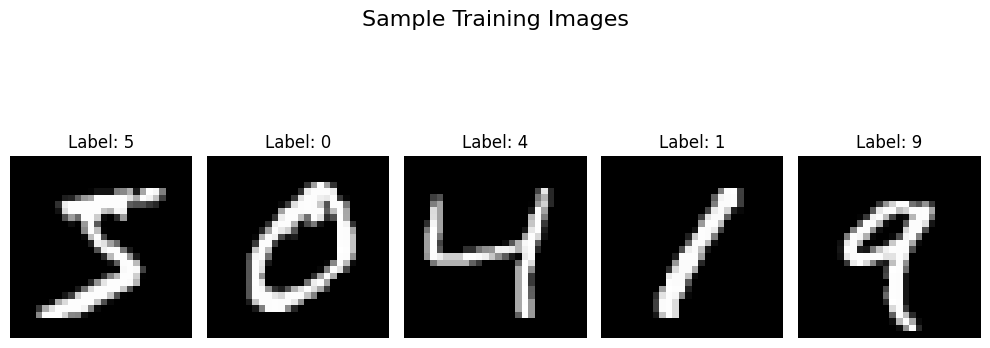


--- Distribution of Training Labels ---
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [21]:
import matplotlib.pyplot as plt
import numpy as np

print('--- Shapes of Processed Data --')
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

print('\n--- Sample Images from Training Set ---')
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.suptitle('Sample Training Images', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print('\n--- Distribution of Training Labels ---')
label_counts = np.sum(y_train, axis=0)
for i, count in enumerate(label_counts):
    print(f"Digit {i}: {int(count)} samples")


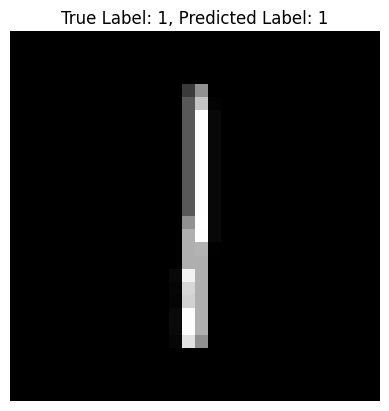

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a random index from the test set
random_index = np.random.randint(0, x_test.shape[0])

# Get the sample image and its true label
sample_image = x_test[random_index]
true_label_one_hot = y_test[random_index]
true_label = np.argmax(true_label_one_hot)

# Reshape the image for display
image_display = sample_image.reshape(28, 28)

# Perform forward propagation to get the model's prediction
A2_sample, _ = forward_propagation(sample_image.reshape(1, -1), final_W1, final_b1, final_W2, final_b2)
predicted_label = np.argmax(A2_sample)

# Display the image and labels
plt.imshow(image_display, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


In [23]:
print("\nEvaluating the model on the test set...")

# 1. Get predictions on the test set
A2_test, _ = forward_propagation(x_test, final_W1, final_b1, final_W2, final_b2)

# 2. Convert one-hot encoded predictions to class labels
predictions_test = np.argmax(A2_test, axis=1)

# 3. Convert one-hot encoded y_test to class labels
true_labels_test = np.argmax(y_test, axis=1)

# 4. Calculate accuracy
test_accuracy = np.mean(predictions_test == true_labels_test) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")


Evaluating the model on the test set...
Test Accuracy: 97.03%


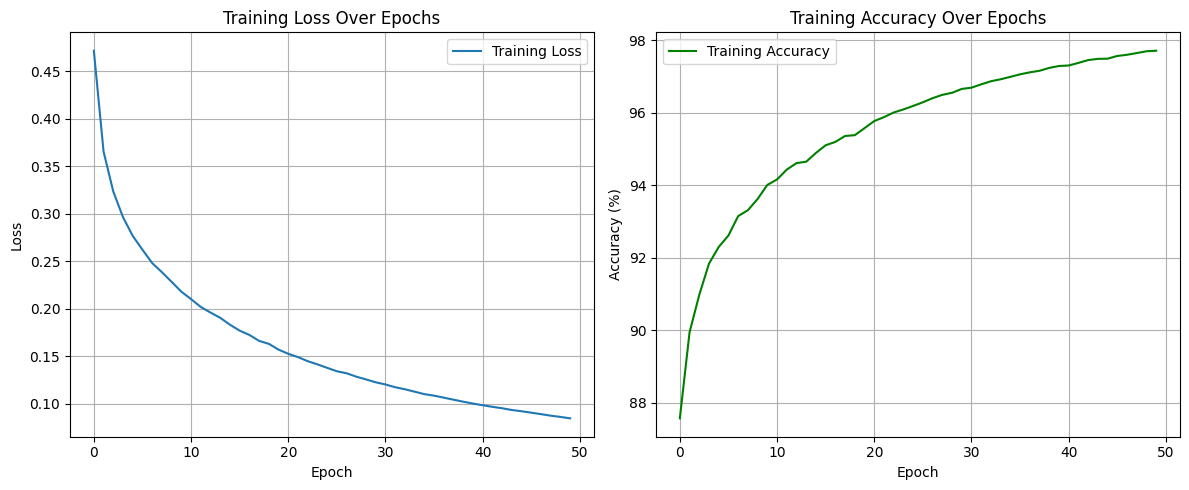

Training loss and accuracy plots have been displayed.


In [24]:
import matplotlib.pyplot as plt

# 1. Plot training loss history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Plot training accuracy history
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='green')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training loss and accuracy plots have been displayed.")